<a href="https://colab.research.google.com/github/jiminkyung/orm/blob/main/python/240122_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 판다스 개요

In [ ]:
# 판다스 import
import pandas as pd  # as pd: 별명/별칭

# 데이터프레임 생성
# 1. 딕셔너리 형태로 가져온다.
data = {'이름': ['홍길동', '임꺽정', '이순신'],
        '나이': [30, 35, 40],
        '도시': ['서울', '부산', '광주']}
df = pd.DataFrame(data)
print(df)

    이름  나이  도시
0  홍길동  30  서울
1  임꺽정  35  부산
2  이순신  40  광주


In [ ]:
import pandas as pd

# 시리즈 생성
names = pd.Series(['홍길동', '임꺽정', '이순신'])

In [ ]:
print(names)
type(names)

0    홍길동
1    임꺽정
2    이순신
dtype: object


pandas.core.series.Series

In [ ]:
import pandas as pd

# 엑셀 파일을 DataFrame으로 불러오기
# 지금 해당 샘플파일이 없어서 error.
df = pd.read_excel("example.xlsx")
df = pd.read_csv("example.csv")

In [ ]:
# csv파일 읽어들이기
# 요구정의서 / 컬럼에 대한 히스토리! 를 파악한 뒤에 작업하는것을 추천.
test = pd.read_csv("/content/sample_data/california_housing_test.csv")
print(test.head()) # 상위 5개
print(test.tail()) # 하위 5개
# => 둘 다 정상적으로 출력된다면 => 데이터가 밀리지는 않았군!

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.05     37.37                27.0       3885.0           661.0   
1    -118.30     34.26                43.0       1510.0           310.0   
2    -117.81     33.78                27.0       3589.0           507.0   
3    -118.36     33.82                28.0         67.0            15.0   
4    -119.67     36.33                19.0       1241.0           244.0   

   population  households  median_income  median_house_value  
0      1537.0       606.0         6.6085            344700.0  
1       809.0       277.0         3.5990            176500.0  
2      1484.0       495.0         5.7934            270500.0  
3        49.0        11.0         6.1359            330000.0  
4       850.0       237.0         2.9375             81700.0  
      longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
2995    -119.86     34.42                23.0       1450.0           642.0   
2996    -118.14

In [ ]:
# DataFrame의 요약 정보 출력
print(test.info())

# Null
# 1. Null이 있으면 머신러닝 모델의 대부부늘 돌리지 못합니다.(딥러닝도 거의 동일)
# xgboost / 딥러닝 일부 모델 중 옵션변경을 통해서 (Null -> 하나의 값)으로 치환 가능
# 하지만 Null은 -> 0(x) NAN(x). 0과 NAN 둘 다 아니기 때문에
# Null값을 임의로 치환하는것은 굉장히 위험하다.
# Null을 최대한 제거하고 분석하는 것을 추천
# -> Null을 가지고 있는 데이터가 다른 데이터와 다른지 아닌지 파악

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           3000 non-null   float64
 1   latitude            3000 non-null   float64
 2   housing_median_age  3000 non-null   float64
 3   total_rooms         3000 non-null   float64
 4   total_bedrooms      3000 non-null   float64
 5   population          3000 non-null   float64
 6   households          3000 non-null   float64
 7   median_income       3000 non-null   float64
 8   median_house_value  3000 non-null   float64
dtypes: float64(9)
memory usage: 211.1 KB
None


In [ ]:
# DataFrame의 통계적 요약 정보 출력
# 1. Min / Max 값을 봐야함 -> 999999 / -999999 / 이상한 문자로 된 값 ***** 들이 나올 수 있음.
# 2. Mean -> 평균이 우리가 아는 수치와 비슷한지
# 3. 25% 50% 75% -> 데이터가 편중되어 있는지 아니면 잘 분포되어있는지 -> 표준편차
# 3번 예) 1 1 1 1 1 1 1 1 1 1 1 2 3 4 5 (우리 어플 사용량!)
print(test.describe())

         longitude    latitude  housing_median_age   total_rooms  \
count  3000.000000  3000.00000         3000.000000   3000.000000   
mean   -119.589200    35.63539           28.845333   2599.578667   
std       1.994936     2.12967           12.555396   2155.593332   
min    -124.180000    32.56000            1.000000      6.000000   
25%    -121.810000    33.93000           18.000000   1401.000000   
50%    -118.485000    34.27000           29.000000   2106.000000   
75%    -118.020000    37.69000           37.000000   3129.000000   
max    -114.490000    41.92000           52.000000  30450.000000   

       total_bedrooms    population  households  median_income  \
count     3000.000000   3000.000000  3000.00000    3000.000000   
mean       529.950667   1402.798667   489.91200       3.807272   
std        415.654368   1030.543012   365.42271       1.854512   
min          2.000000      5.000000     2.00000       0.499900   
25%        291.000000    780.000000   273.00000       2.5

In [ ]:
# inplace 매개변수를 사용하지 않는 경우
df = df.dropna()

# inplace=True를 사용하는 경우
df.dropna(inplace=True) # dropna 처리된 값만 보여주고, 원본반영 X

In [ ]:
# 결측치 처리

import pandas as pd
import numpy as np

# 샘플 데이터프레임 생성
# 문자형 데이터는 desribe() 사용해도 통계량이 나오지 않는다. -> count()
data = {'이름': ['홍길동', '임꺽정', None],
        '나이': [30, None, 40],
        '도시': ['서울', '부산', '광주']}
df = pd.DataFrame(data)

In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   이름      2 non-null      object 
 1   나이      2 non-null      float64
 2   도시      3 non-null      object 
dtypes: float64(1), object(2)
memory usage: 200.0+ bytes


,나이
count,2.000000
mean,35.000000
std,7.071068
min,30.000000
25%,32.500000
50%,35.000000
75%,37.500000
max,40.000000


꼭 사본같은것(df처럼)을 만들어서 따로 작업할것...  
원본 자체를 날려먹는 일도 빈번하다.

In [ ]:
# 결측치 제거=False로 주었을때
df.dropna(inplace=False)

,이름,나이,도시
0,홍길동,30.0,서울


In [ ]:
print("\n결측치 제거 후 데이터프레임:\n", df)
# 결측치가 제거된 줄 알았지만 아님.


결측치 제거 후 데이터프레임:
      이름    나이  도시
0   홍길동  30.0  서울
1   임꺽정   NaN  부산
2  None  40.0  광주


In [ ]:
# 결측치가 포함된 데이터프레임 출력
print("원본 데이터프레임:\n", df)

# 결측치 제거
df.dropna(inplace=True)

# 결측치가 제거된 데이터프레임 출력
print("\n결측치 제거 후 데이터프레임:\n", df)

원본 데이터프레임:
      이름    나이  도시
0   홍길동  30.0  서울
1   임꺽정   NaN  부산
2  None  40.0  광주

결측치 제거 후 데이터프레임:
     이름    나이  도시
0  홍길동  30.0  서울


# 2. 데이터프레임 / 시리즈

In [ ]:
# Pandas DataFrame 예시
import pandas as pd

df = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35],
    'City': ['New York', 'Paris', 'Berlin']
})

# 각 속성 호출
print("Shape:", df.shape)
print("Data Types:\n", df.dtypes)
print("Index:", df.index)
print("Columns:", df.columns)

Shape: (3, 3)
Data Types:
 Name    object
Age      int64
City    object
dtype: object
Index: RangeIndex(start=0, stop=3, step=1)
Columns: Index(['Name', 'Age', 'City'], dtype='object')


In [ ]:
# 실습!
test = pd.read_csv("/content/sample_data/california_housing_test.csv")

In [ ]:
# 각 속성 호출
print("Shape:", test.shape)
print("Data Types:\n", test.dtypes)
print("Index:", test.index)
print("Columns:", test.columns)

Shape: (3000, 9)
Data Types:
 longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
dtype: object
Index: RangeIndex(start=0, stop=3000, step=1)
Columns: Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')


자료형은 `astype`를 사용해서 변환한다.(`datetime`은 다른 함수 사용)

In [ ]:
import pandas as pd

# 예시 데이터프레임 생성
data = {
    'Name': ['Alice', 'Bob'],  # 문자열 타입
    'Age': ['25', '30'],       # 숫자 데이터를 문자열로 표현
    'Member': ['True', 'False'],  # 불린 데이터를 문자열로 표현
    'Join Date': ['2021-01-01', '2021-07-01']  # 날짜 데이터를 문자열로 표현
}

# DB -> 문자열! -> 메모리 / 저장용량 효율적!

df = pd.DataFrame(data)
# 결과 출력
print(df)
print(df.dtypes)

    Name Age Member   Join Date
0  Alice  25   True  2021-01-01
1    Bob  30  False  2021-07-01
Name         object
Age          object
Member       object
Join Date    object
dtype: object


In [ ]:
# 데이터 타입 변환
df['Age'] = df['Age'].astype(int)
# 결과 출력
print(df)
print(df.dtypes)

    Name  Age Member   Join Date
0  Alice   25   True  2021-01-01
1    Bob   30  False  2021-07-01
Name         object
Age           int64
Member       object
Join Date    object
dtype: object


In [ ]:
df['Member'] = df['Member'].astype(bool)  # 'Member' 열을 불린형으로 변환
# 결과 출력
print(df)
print(df.dtypes)

    Name  Age  Member   Join Date
0  Alice   25    True  2021-01-01
1    Bob   30    True  2021-07-01
Name         object
Age           int64
Member         bool
Join Date    object
dtype: object


In [ ]:
# 데이터 타입 변환
df['Join Date'] = pd.to_datetime(df['Join Date'])  # 'Join Date' 열을 datetime으로 변환

# 결과 출력
print(df)
print(df.dtypes)

    Name  Age  Member  Join Date
0  Alice   25    True 2021-01-01
1    Bob   30    True 2021-07-01
Name                 object
Age                   int64
Member                 bool
Join Date    datetime64[ns]
dtype: object


In [ ]:
df_joindate = df['Join Date']
df_joindate.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2 entries, 0 to 1
Series name: Join Date
Non-Null Count  Dtype         
--------------  -----         
2 non-null      datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 144.0 bytes


In [ ]:
df_joindate_age = df[['Join Date', 'Age']]
df_joindate_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Join Date  2 non-null      datetime64[ns]
 1   Age        2 non-null      int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 160.0 bytes


In [ ]:
import pandas as pd
import numpy as np

# 예시 데이터프레임 생성
data = {
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35],
    'City': ['New York', 'Paris', 'Berlin']
}
df = pd.DataFrame(data)

# 단일 열 선택 -> 결과는 Series
age_series = df['Age']
print(type(age_series))

# 다중 열 선택 -> 결과는 DataFrame
subset_df = df[['Name', 'City']]
print(type(subset_df))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [ ]:
# loc 사용 예시
print(df.loc[:, 'Age'])

# iloc 사용 예시
print(df.iloc[:, 1])

0    25
1    30
2    35
Name: Age, dtype: int64
0    25
1    30
2    35
Name: Age, dtype: int64


In [ ]:
# 결측치 추가
# [행 / 열] <= 기억해두자
df.loc[1, 'Age'] = np.nan

# 결측치 확인
# isnull -> null이 아니면 False 맞으면 True
print(df['Age'].isnull())

0    False
1     True
2    False
Name: Age, dtype: bool


In [ ]:
import pandas as pd

# Series 생성
data = pd.Series([10, 20, 20, 30, 40])

# sum(), mean(), value_counts() 사용 예시
print("Sum:", data.sum())           # 합계
print("Mean:", data.mean())         # 평균
print("Value Counts:\n", data.value_counts())  # 빈도 계산

Sum: 120
Mean: 24.0
Value Counts:
 20    2
10    1
30    1
40    1
dtype: int64


분산에 루트 씌운게 표준편차  
고등학교 수학 문제집 안버린거 있나 찾아보자^^

In [ ]:
import pandas as pd

# Series 생성
data = pd.Series([10, 15, 20, 25, 30])

# 다양한 메서드 활용
print("Minimum:", data.min())          # 최소값
print("Maximum:", data.max())          # 최대값
print("Standard Deviation:", data.std())  # 표준편차
print("Variance:", data.var())          # 분산
print("Number of Unique Values:", data.nunique())  # 고유값 개수

# 데이터프레임 요약
df = pd.DataFrame({
    'Age': [25, 30, 35, 40, 45],
    'Salary': [50000, 55000, 60000, 65000, 70000]
})
print("\nDataFrame Summary:\n", df.describe())
print("\nDataFrame Info:")
df.info()

Minimum: 10
Maximum: 30
Standard Deviation: 7.905694150420948
Variance: 62.5
Number of Unique Values: 5

DataFrame Summary:
              Age       Salary
count   5.000000      5.00000
mean   35.000000  60000.00000
std     7.905694   7905.69415
min    25.000000  50000.00000
25%    30.000000  55000.00000
50%    35.000000  60000.00000
75%    40.000000  65000.00000
max    45.000000  70000.00000

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Age     5 non-null      int64
 1   Salary  5 non-null      int64
dtypes: int64(2)
memory usage: 208.0 bytes


In [ ]:
# 실습!
test = pd.read_csv("/content/sample_data/california_housing_test.csv")
test

# 데이터프레임의 'housing_median_age' 열을 Series로 변환하고 숫자형으로 변환
test_series = test['housing_median_age']
print(test_series)

0       27.0
1       43.0
2       27.0
3       28.0
4       19.0
        ... 
2995    23.0
2996    27.0
2997    10.0
2998    40.0
2999    42.0
Name: housing_median_age, Length: 3000, dtype: float64


In [ ]:
# 각 요소에 1 더하기
test_plus_one = test_series + 1
print("Stars Plus One:\n", test_plus_one.head())

Stars Plus One:
 0    28.0
1    44.0
2    28.0
3    29.0
4    20.0
Name: housing_median_age, dtype: float64


In [ ]:
# 각 요소에 2 곱하기
test_times_two = test_series * 2
print("Stars Times Two:\n", test_times_two.head())

Stars Times Two:
 0    54.0
1    86.0
2    54.0
3    56.0
4    38.0
Name: housing_median_age, dtype: float64


사실 이런 연산보단 **'조건부 연산'**을 더 많이 사용하게 될 것임.  
**`조건부 연산(<, >, ==)` <= 중요!!!**

In [ ]:
# 불린 연산이 가능하다 -> 해당하는 값만 가져올 수 있다.
# 고기에서 지방을 빼고 살코기만 계속 발라내는~!
high_age = test_series > 17.0
print("High age:\n", high_age.head())

High age:
 0    True
1    True
2    True
3    True
4    True
Name: housing_median_age, dtype: bool


In [ ]:
# 조건을 만족하는 요소만 필터링
filtered_series = test_series[high_age]
print("Filtered Series:\n", filtered_series.head())

Filtered Series:
 0    27.0
1    43.0
2    27.0
3    28.0
4    19.0
Name: housing_median_age, dtype: float64


In [ ]:
filtered_series

0       27.0
1       43.0
2       27.0
3       28.0
4       19.0
        ... 
2994    35.0
2995    23.0
2996    27.0
2998    40.0
2999    42.0
Name: housing_median_age, Length: 2322, dtype: float64

column 이름 변경할때는 `rename`메서드 사용

In [ ]:
import pandas as pd

df = pd.DataFrame({
    'A': [1, 2, 3],
    'B': [4, 5, 6],
    'C': [7, 8, 9]
})

# 열 이름 변경
# columns({변경하기전 : 변경한후, 변경하기전 : 변경한후 ...})
df = df.rename(columns={'A': 'X', 'B': 'Y', 'C': 'Z'})
print(df)

   X  Y  Z
0  1  4  7
1  2  5  8
2  3  6  9


In [ ]:
# 모든 열 이름 변경
df.columns = ['X', 'Y', 'Z']
print(df)

   X  Y  Z
0  1  4  7
1  2  5  8
2  3  6  9


# 열의 생성과 삭제

In [ ]:
import pandas as pd

df = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35]
})

In [ ]:
# 이건 많이 사용하지 않음
# concat / join 을 사용하는 편(데이터 결합)

# 'Salary'라는 새 열 추가
df['Salary'] = [50000, 60000, 70000]

# 사실 위의 방식(직접추가)보다는,
df['Salary'] = 다른 데이터에서 가져온 자료
# 인 경우가 더 많기 때문임.
print(df)

      Name  Age  Salary
0    Alice   25   50000
1      Bob   30   60000
2  Charlie   35   70000


In [ ]:
# drop(중요!)
# Data 컬럼이 1000개! 정도일 경우 =>
# 1. ram 효율을 증대하기 위해서 import할때만 전체 가져옴 -> 작업할때엔 필요한 변수만!
# 2. 머신러닝 / 딥러닝 ! -> 분석에 필요한 변수만 가져올때!

# 'Age' 열 삭제
df = df.drop('Age', axis=1) #axis=1 열/컬럼 (주의)
print(df)

      Name  Salary
0    Alice   50000
1      Bob   60000
2  Charlie   70000


# 결합

In [ ]:
import pandas as pd

# Sample DataFrames
df1 = pd.DataFrame({'A': [1, 2], 'B': [3, 4]})
df2 = pd.DataFrame({'A': [5, 6], 'B': [7, 8]})

In [ ]:
# 가로로 연결 (열 방향)
# 주의할 점 - df1과 df2가 동일한 행을 가지고 있을때만 가능! -> 그렇지 않으면 join 사용
result = pd.concat([df1, df2], axis=1)
print(result)

   A  B  A  B
0  1  3  5  7
1  2  4  6  8


In [ ]:
# 가로로 연결 (열 방향) - 열 이름 다름
result = pd.concat([df1, df2], axis=1, ignore_index=True)
print(result)

   0  1  2  3
0  1  3  5  7
1  2  4  6  8


In [ ]:
# 세로로 연결 (행 방향) - 인덱스 다름
result = pd.concat([df1, df2], ignore_index=True) # axis=0
print(result)

   A  B
0  1  3
1  2  4
2  5  7
3  6  8


In [ ]:
# 어떨때 사용할까요?

# 2023년 1월 ~ 2024년 1월 -> 분석열심히함.
# 2024년 2월이 신규로 왔다.
# 같은 경우에 '세로결합' 사용.

1. 조건에 대해서 / 내가 무엇을 할지에 대해서 잘 정의
2. 이 중에서 반복작업!을 할게 무엇일지
    1. 대시보드
    2. 반복문 / 함수 => 프로그램화!
3. 반복이 되면 패턴화!
    1. 패턴을 가지고 EDA 추가적으로
    2. 해당 패턴이 왜 발생되었는가?

# EDA 실습

In [ ]:
import pandas as pd
dataset = pd.read_csv('/content/The-Big-List-20231127-Reviews-to-4650.csv', encoding='latin1')

In [ ]:
dataset.head()
# 자료형 파악 가능

,Review #,Brand,Variety,Style,Country,Stars,T
0,4650,Jasmine,XXL Bihun Segera Penang White Curry,Pack,Malaysia,5,NaN
1,4649,Indomie,Mi Instan Mi Keriting Goreng Spesial,Pack,Indonesia,5,NaN
2,4648,MAMA,Oriental Kitchen Dried Instant Noodles Truffle...,Pack,Thailand,4.5,NaN
3,4647,Ottogi,Jin Jjajang Smoked Black Bean Flavor,Pack,United States,4.5,NaN
4,4646,Samyang Foods,Samyand Ramen,Pack,United States,5,NaN


In [ ]:
dataset.info()
# 자료형 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4650 entries, 0 to 4649
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Review #  4650 non-null   int64  
 1   Brand     4650 non-null   object 
 2   Variety   4650 non-null   object 
 3   Style     4650 non-null   object 
 4   Country   4650 non-null   object 
 5   Stars     4648 non-null   object 
 6   T         0 non-null      float64
dtypes: float64(1), int64(1), object(5)
memory usage: 254.4+ KB


In [ ]:
dataset.describe()

,Review #,T
count,4650.000000,0.0
mean,2325.500000,NaN
std,1342.483706,NaN
min,1.000000,NaN
25%,1163.250000,NaN
50%,2325.500000,NaN
75%,3487.750000,NaN
max,4650.000000,NaN


In [ ]:
print(dataset['Brand'].value_counts())
# 리뷰가 많은 기업 순위를 확인할 수 있음.

Nissin             567
Maruchan           182
Myojo              152
Nongshim           136
Samyang Foods      122
                  ... 
Kiseki Foods         1
Xiuhe                1
Dr. McDougall's      1
Hi-Lai Foods         1
Westbrae             1
Name: Brand, Length: 698, dtype: int64


In [ ]:
# 고유값 확인 -> 중복되지 않는 값
dataset.nunique()

Review #    4650
Brand        698
Variety     4325
Style         10
Country       54
Stars         53
T              0
dtype: int64

In [ ]:
# 총 데이터셋 4650, 7개의 컬럼! 임을 확인할 수 있다.

In [ ]:
# 결측치 제거
# True=1 / False=0
print(dataset.isnull().sum()) # null의 갯수가 sum

Review #       0
Brand          0
Variety        0
Style          0
Country        0
Stars          2
T           4650
dtype: int64


In [ ]:
# 'T' 열 삭제
dataset = dataset.drop('T', axis=1)

In [ ]:
dataset # T가 사라진것을 확인할 수 있다.

,Review #,Brand,Variety,Style,Country,Stars
0,4650,Jasmine,XXL Bihun Segera Penang White Curry,Pack,Malaysia,5
1,4649,Indomie,Mi Instan Mi Keriting Goreng Spesial,Pack,Indonesia,5
2,4648,MAMA,Oriental Kitchen Dried Instant Noodles Truffle...,Pack,Thailand,4.5
3,4647,Ottogi,Jin Jjajang Smoked Black Bean Flavor,Pack,United States,4.5
4,4646,Samyang Foods,Samyand Ramen,Pack,United States,5
...,...,...,...,...,...,...
4645,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5
4646,4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1
4647,3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2
4648,2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2


In [ ]:
dataset = dataset.dropna() # Stars(별점) null값 삭제
print(dataset.isnull().sum())

Review #    0
Brand       0
Variety     0
Style       0
Country     0
Stars       0
dtype: int64


In [ ]:
# 문자형을 숫자로 변경하는 방법 1. astype 2. to_numeric
dataset['Stars'] = pd.to_numeric(dataset['Stars'], errors='coerce')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4635 entries, 0 to 4649
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Review #  4635 non-null   int64  
 1   Brand     4635 non-null   object 
 2   Variety   4635 non-null   object 
 3   Style     4635 non-null   object 
 4   Country   4635 non-null   object 
 5   Stars     4635 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 253.5+ KB


In [ ]:
dataset.describe()

,Review #,Stars
count,4648.000000,4635.000000
mean,2324.620267,3.840982
std,1342.096800,6.440785
min,1.000000,0.000000
25%,1162.750000,3.500000
50%,2324.500000,3.750000
75%,3486.250000,4.500000
max,4650.000000,435.000000


In [ ]:
# 실행은 X. 배우지 않은 내용임. 이런 메서드가 있다 정도만 확인하라.

# 중복 데이터 확인 - duplicated()
duplicates_count = dataset.duplicated().sum()
print(duplicates_count)

# 전체 데이터에 대한 중복 제거
dataset

In [ ]:
# IQR 기반 이상치 제거
Q1 = dataset['Stars'].quantile(0.25)
Q3 = dataset['Stars'].quantile(0.75)
IQR = Q3 - Q1
dataset = dataset[~((dataset['Stars'] < (Q1 - 1.5 * IQR)) | (dataset['Stars'] > (Q3 + 1.5 * IQR)))]

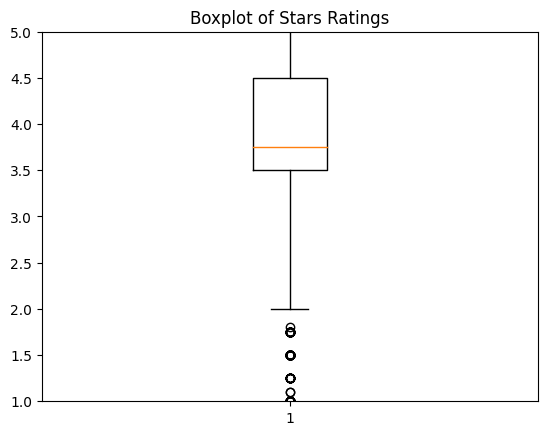

In [ ]:
dataset = pd.read_csv('/content/The-Big-List-20231127-Reviews-to-4650.csv', encoding='latin1')  # 인코딩이 필요한 경우 변경

# 'Stars' 컬럼의 비숫자 값을 NaN으로 변환
dataset['Stars'] = pd.to_numeric(dataset['Stars'], errors='coerce')

# NaN 값 제거
dataset = dataset.dropna(subset=['Stars'])

# 'Stars' 컬럼에 대한 박스플롯 생성
plt.boxplot(dataset['Stars'])
plt.title('Boxplot of Stars Ratings')
plt.ylim(1, 5)  # y축 범위를 1에서 5로 설정
plt.show()